# Expansion of elastic biharmonic source terms and elastic forces in terms of auxiliary variables

## Set up system

In [1]:
from sympy import *

In [2]:
x, y, z = symbols('x y z')

In [3]:
i, j, k, m, p = symbols('i j k m p')

In [4]:
eta = Function('eta', real=True)(x, y)
mu = Function('mu', real=True)(x, y)
nu = Function('nu', real=True)(x, y)

In [5]:
Q = Matrix([[2/sqrt(3)*eta, nu, 0],
            [nu, -1/sqrt(3)*eta + mu, 0],
            [0, 0, -1/sqrt(3)*eta - mu]])
Q

Matrix([
[2*sqrt(3)*eta(x, y)/3,                        nu(x, y),                               0],
[             nu(x, y), -sqrt(3)*eta(x, y)/3 + mu(x, y),                               0],
[                    0,                               0, -sqrt(3)*eta(x, y)/3 - mu(x, y)]])

In [6]:
xi = Matrix([x, y, z])

In [7]:
lims = range(0, 3)

# Source terms

## $\Phi_{L_1}$ term

In [8]:
Phi_L1 = -sum(Eijk(3, p + 1, i + 1)
              *diff(diff(diff(Q[k, l], xi[j]), xi[j]), xi[p])
              *diff(Q[k, l], xi[i])
              for i in lims
              for j in lims
              for k in lims
              for l in lims
              for p in lims
              )

In [9]:
Phi_L1 = simplify(Phi_L1)

In [10]:
Phi_L1

2*Derivative(eta(x, y), x)*Derivative(eta(x, y), (y, 3)) + 2*Derivative(eta(x, y), x)*Derivative(eta(x, y), (x, 2), y) - 2*Derivative(eta(x, y), (x, 3))*Derivative(eta(x, y), y) - 2*Derivative(eta(x, y), y)*Derivative(eta(x, y), x, (y, 2)) + 2*Derivative(mu(x, y), x)*Derivative(mu(x, y), (y, 3)) + 2*Derivative(mu(x, y), x)*Derivative(mu(x, y), (x, 2), y) - 2*Derivative(mu(x, y), (x, 3))*Derivative(mu(x, y), y) - 2*Derivative(mu(x, y), y)*Derivative(mu(x, y), x, (y, 2)) + 2*Derivative(nu(x, y), x)*Derivative(nu(x, y), (y, 3)) + 2*Derivative(nu(x, y), x)*Derivative(nu(x, y), (x, 2), y) - 2*Derivative(nu(x, y), (x, 3))*Derivative(nu(x, y), y) - 2*Derivative(nu(x, y), y)*Derivative(nu(x, y), x, (y, 2))

In [11]:
print(latex(simplify(Phi_L1)))

2 \frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{3}}{\partial y^{3}} \eta{\left(x,y \right)} + 2 \frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{3}}{\partial y\partial x^{2}} \eta{\left(x,y \right)} - 2 \frac{\partial^{3}}{\partial x^{3}} \eta{\left(x,y \right)} \frac{\partial}{\partial y} \eta{\left(x,y \right)} - 2 \frac{\partial}{\partial y} \eta{\left(x,y \right)} \frac{\partial^{3}}{\partial y^{2}\partial x} \eta{\left(x,y \right)} + 2 \frac{\partial}{\partial x} \mu{\left(x,y \right)} \frac{\partial^{3}}{\partial y^{3}} \mu{\left(x,y \right)} + 2 \frac{\partial}{\partial x} \mu{\left(x,y \right)} \frac{\partial^{3}}{\partial y\partial x^{2}} \mu{\left(x,y \right)} - 2 \frac{\partial^{3}}{\partial x^{3}} \mu{\left(x,y \right)} \frac{\partial}{\partial y} \mu{\left(x,y \right)} - 2 \frac{\partial}{\partial y} \mu{\left(x,y \right)} \frac{\partial^{3}}{\partial y^{2}\partial x} \mu{\left(x,y \right)} + 2 \frac{\partial}{\partial x} \nu{\left(

## $\Phi_{L_2}$ term

In [12]:
Phi_L2 = -sum(Eijk(3, p + 1, i + 1)
              *diff(diff(diff(Q[k, m], xi[m]), xi[j]), xi[p])
              *diff(Q[k, j], xi[i])
              for i in lims
              for j in lims
              for k in lims
              for m in lims
              for p in lims
              )

In [13]:
simplify(Phi_L2)

Derivative(eta(x, y), x)*Derivative(eta(x, y), (y, 3))/3 - sqrt(3)*Derivative(eta(x, y), x)*Derivative(mu(x, y), (y, 3))/3 + 4*Derivative(eta(x, y), x)*Derivative(eta(x, y), (x, 2), y)/3 + sqrt(3)*Derivative(eta(x, y), x)*Derivative(nu(x, y), x, (y, 2))/3 - 4*Derivative(eta(x, y), (x, 3))*Derivative(eta(x, y), y)/3 - Derivative(eta(x, y), y)*Derivative(eta(x, y), x, (y, 2))/3 + sqrt(3)*Derivative(eta(x, y), y)*Derivative(mu(x, y), x, (y, 2))/3 - sqrt(3)*Derivative(eta(x, y), y)*Derivative(nu(x, y), (x, 2), y)/3 - sqrt(3)*Derivative(eta(x, y), (y, 3))*Derivative(mu(x, y), x)/3 + Derivative(mu(x, y), x)*Derivative(mu(x, y), (y, 3)) + Derivative(mu(x, y), x)*Derivative(nu(x, y), x, (y, 2)) + sqrt(3)*Derivative(mu(x, y), y)*Derivative(eta(x, y), x, (y, 2))/3 - Derivative(mu(x, y), y)*Derivative(mu(x, y), x, (y, 2)) - Derivative(mu(x, y), y)*Derivative(nu(x, y), (x, 2), y) + Derivative(nu(x, y), x)*Derivative(nu(x, y), (y, 3)) + sqrt(3)*Derivative(nu(x, y), x)*Derivative(eta(x, y), x, (y, 2

In [14]:
print(latex(simplify(Phi_L2)))

\frac{\frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{3}}{\partial y^{3}} \eta{\left(x,y \right)}}{3} - \frac{\sqrt{3} \frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{3}}{\partial y^{3}} \mu{\left(x,y \right)}}{3} + \frac{4 \frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{3}}{\partial y\partial x^{2}} \eta{\left(x,y \right)}}{3} + \frac{\sqrt{3} \frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{3}}{\partial y^{2}\partial x} \nu{\left(x,y \right)}}{3} - \frac{4 \frac{\partial^{3}}{\partial x^{3}} \eta{\left(x,y \right)} \frac{\partial}{\partial y} \eta{\left(x,y \right)}}{3} - \frac{\frac{\partial}{\partial y} \eta{\left(x,y \right)} \frac{\partial^{3}}{\partial y^{2}\partial x} \eta{\left(x,y \right)}}{3} + \frac{\sqrt{3} \frac{\partial}{\partial y} \eta{\left(x,y \right)} \frac{\partial^{3}}{\partial y^{2}\partial x} \mu{\left(x,y \right)}}{3} - \frac{\sqrt{3} \frac{\partial}{\partial y} \eta{\left(x,y \right

## Each $\Phi_{L_3}$ term individually

In [15]:
f1 = sum(Eijk(3, p + 1, i + 1)
          *diff(diff(Q[j, m], xi[j]), xi[p])
          *diff(Q[k, l], xi[m])
          *diff(Q[k, l], xi[i])
          for i in lims
          for j in lims
          for k in lims
          for l in lims
          for m in lims
          for p in lims
         )

simplify(f1)

-2*Derivative(eta(x, y), x)**2*Derivative(nu(x, y), (y, 2)) - 4*sqrt(3)*Derivative(eta(x, y), x)**2*Derivative(eta(x, y), x, y)/3 + 4*sqrt(3)*Derivative(eta(x, y), x)*Derivative(eta(x, y), (x, 2))*Derivative(eta(x, y), y)/3 + 2*sqrt(3)*Derivative(eta(x, y), x)*Derivative(eta(x, y), y)*Derivative(eta(x, y), (y, 2))/3 - 2*Derivative(eta(x, y), x)*Derivative(eta(x, y), y)*Derivative(mu(x, y), (y, 2)) + 4*sqrt(3)*Derivative(eta(x, y), (x, 2))*Derivative(mu(x, y), x)*Derivative(mu(x, y), y)/3 + 4*sqrt(3)*Derivative(eta(x, y), (x, 2))*Derivative(nu(x, y), x)*Derivative(nu(x, y), y)/3 + 2*Derivative(eta(x, y), y)**2*Derivative(nu(x, y), (x, 2)) - 2*sqrt(3)*Derivative(eta(x, y), y)**2*Derivative(eta(x, y), x, y)/3 + 2*Derivative(eta(x, y), y)**2*Derivative(mu(x, y), x, y) + 2*sqrt(3)*Derivative(eta(x, y), (y, 2))*Derivative(mu(x, y), x)*Derivative(mu(x, y), y)/3 + 2*sqrt(3)*Derivative(eta(x, y), (y, 2))*Derivative(nu(x, y), x)*Derivative(nu(x, y), y)/3 - 2*Derivative(mu(x, y), x)**2*Derivative

In [16]:
f2 = sum(Eijk(3, p + 1, i + 1)
         *diff(Q[j, m], xi[j])
         *diff(diff(Q[k, l], xi[p]), xi[m])
         *diff(Q[k, l], xi[i])
         for i in lims
         for j in lims
         for k in lims
         for l in lims
         for m in lims
         for p in lims
        )

simplify(f2)

-4*sqrt(3)*Derivative(eta(x, y), x)**2*Derivative(eta(x, y), x, y)/3 + 4*sqrt(3)*Derivative(eta(x, y), x)*Derivative(eta(x, y), (x, 2))*Derivative(eta(x, y), y)/3 + 2*sqrt(3)*Derivative(eta(x, y), x)*Derivative(eta(x, y), y)*Derivative(eta(x, y), (y, 2))/3 - 2*Derivative(eta(x, y), x)*Derivative(eta(x, y), (y, 2))*Derivative(mu(x, y), y) - 2*Derivative(eta(x, y), x)*Derivative(eta(x, y), (y, 2))*Derivative(nu(x, y), x) - 4*sqrt(3)*Derivative(eta(x, y), x)*Derivative(mu(x, y), x)*Derivative(mu(x, y), x, y)/3 + 4*sqrt(3)*Derivative(eta(x, y), x)*Derivative(mu(x, y), (x, 2))*Derivative(mu(x, y), y)/3 - 4*sqrt(3)*Derivative(eta(x, y), x)*Derivative(nu(x, y), x)*Derivative(nu(x, y), x, y)/3 + 4*sqrt(3)*Derivative(eta(x, y), x)*Derivative(nu(x, y), (x, 2))*Derivative(nu(x, y), y)/3 - 2*Derivative(eta(x, y), x)*Derivative(nu(x, y), y)*Derivative(eta(x, y), x, y) + 2*Derivative(eta(x, y), (x, 2))*Derivative(eta(x, y), y)*Derivative(nu(x, y), y) - 2*sqrt(3)*Derivative(eta(x, y), y)**2*Derivativ

In [17]:
f3 = sum(Eijk(3, p + 1, i + 1)
         *diff(Q[j, m], xi[p])
         *diff(diff(Q[k, l], xi[j]), xi[m])
         *diff(Q[k, l], xi[i])
         for i in lims
         for j in lims
         for k in lims
         for l in lims
         for m in lims
         for p in lims
        )

simplify(f3)

-2*Derivative(eta(x, y), x)*Derivative(eta(x, y), (y, 2))*Derivative(mu(x, y), y) + 4*sqrt(3)*Derivative(eta(x, y), x)*Derivative(mu(x, y), (x, 2))*Derivative(mu(x, y), y)/3 - 2*sqrt(3)*Derivative(eta(x, y), x)*Derivative(mu(x, y), y)*Derivative(mu(x, y), (y, 2))/3 + 4*sqrt(3)*Derivative(eta(x, y), x)*Derivative(nu(x, y), (x, 2))*Derivative(nu(x, y), y)/3 - 2*sqrt(3)*Derivative(eta(x, y), x)*Derivative(nu(x, y), y)*Derivative(nu(x, y), (y, 2))/3 - 4*Derivative(eta(x, y), x)*Derivative(nu(x, y), y)*Derivative(eta(x, y), x, y) + 2*Derivative(eta(x, y), y)*Derivative(eta(x, y), (y, 2))*Derivative(mu(x, y), x) - 4*sqrt(3)*Derivative(eta(x, y), y)*Derivative(mu(x, y), x)*Derivative(mu(x, y), (x, 2))/3 + 2*sqrt(3)*Derivative(eta(x, y), y)*Derivative(mu(x, y), x)*Derivative(mu(x, y), (y, 2))/3 - 4*sqrt(3)*Derivative(eta(x, y), y)*Derivative(nu(x, y), x)*Derivative(nu(x, y), (x, 2))/3 + 2*sqrt(3)*Derivative(eta(x, y), y)*Derivative(nu(x, y), x)*Derivative(nu(x, y), (y, 2))/3 + 4*Derivative(eta

In [18]:
f4 = sum(Eijk(3, p + 1, i + 1)
         *Q[j, m]
         *diff(diff(diff(Q[k, l], xi[p]), xi[j]), xi[m])
         *diff(Q[k, l], xi[i])
         for i in lims
         for j in lims
         for k in lims
         for l in lims
         for m in lims
         for p in lims
        )

simplify(f4)

2*sqrt(3)*eta(x, y)*Derivative(eta(x, y), x)*Derivative(eta(x, y), (y, 3))/3 - 4*sqrt(3)*eta(x, y)*Derivative(eta(x, y), x)*Derivative(eta(x, y), (x, 2), y)/3 + 4*sqrt(3)*eta(x, y)*Derivative(eta(x, y), (x, 3))*Derivative(eta(x, y), y)/3 - 2*sqrt(3)*eta(x, y)*Derivative(eta(x, y), y)*Derivative(eta(x, y), x, (y, 2))/3 + 2*sqrt(3)*eta(x, y)*Derivative(mu(x, y), x)*Derivative(mu(x, y), (y, 3))/3 - 4*sqrt(3)*eta(x, y)*Derivative(mu(x, y), x)*Derivative(mu(x, y), (x, 2), y)/3 + 4*sqrt(3)*eta(x, y)*Derivative(mu(x, y), (x, 3))*Derivative(mu(x, y), y)/3 - 2*sqrt(3)*eta(x, y)*Derivative(mu(x, y), y)*Derivative(mu(x, y), x, (y, 2))/3 + 2*sqrt(3)*eta(x, y)*Derivative(nu(x, y), x)*Derivative(nu(x, y), (y, 3))/3 - 4*sqrt(3)*eta(x, y)*Derivative(nu(x, y), x)*Derivative(nu(x, y), (x, 2), y)/3 + 4*sqrt(3)*eta(x, y)*Derivative(nu(x, y), (x, 3))*Derivative(nu(x, y), y)/3 - 2*sqrt(3)*eta(x, y)*Derivative(nu(x, y), y)*Derivative(nu(x, y), x, (y, 2))/3 - 2*mu(x, y)*Derivative(eta(x, y), x)*Derivative(eta

In [19]:
f5 = sum(Eijk(3, p + 1, i + 1)
         *diff(Q[j, m], xi[p])
         *diff(Q[k, l], xi[m])
         *diff(diff(Q[k, l], xi[i]), xi[j])
         for i in lims
         for j in lims
         for k in lims
         for l in lims
         for m in lims
         for p in lims
        )

simplify(f5)

4*sqrt(3)*Derivative(eta(x, y), x)**2*Derivative(eta(x, y), x, y)/3 - 4*sqrt(3)*Derivative(eta(x, y), x)*Derivative(eta(x, y), (x, 2))*Derivative(eta(x, y), y)/3 - 2*sqrt(3)*Derivative(eta(x, y), x)*Derivative(eta(x, y), y)*Derivative(eta(x, y), (y, 2))/3 + 2*Derivative(eta(x, y), x)*Derivative(eta(x, y), (y, 2))*Derivative(nu(x, y), x) + 4*sqrt(3)*Derivative(eta(x, y), x)*Derivative(mu(x, y), x)*Derivative(mu(x, y), x, y)/3 - 2*sqrt(3)*Derivative(eta(x, y), x)*Derivative(mu(x, y), y)*Derivative(mu(x, y), (y, 2))/3 + 4*sqrt(3)*Derivative(eta(x, y), x)*Derivative(nu(x, y), x)*Derivative(nu(x, y), x, y)/3 - 2*sqrt(3)*Derivative(eta(x, y), x)*Derivative(nu(x, y), y)*Derivative(nu(x, y), (y, 2))/3 - 2*Derivative(eta(x, y), x)*Derivative(nu(x, y), y)*Derivative(eta(x, y), x, y) - 2*Derivative(eta(x, y), (x, 2))*Derivative(eta(x, y), y)*Derivative(nu(x, y), y) + 2*sqrt(3)*Derivative(eta(x, y), y)**2*Derivative(eta(x, y), x, y)/3 + 2*Derivative(eta(x, y), y)*Derivative(eta(x, y), (y, 2))*Deri

In [20]:
Phi_L3 = -simplify(f1 + f2 + f3 + f4 + f5)

In [21]:
Phi_L3

-2*sqrt(3)*eta(x, y)*Derivative(eta(x, y), x)*Derivative(eta(x, y), (y, 3))/3 + 4*sqrt(3)*eta(x, y)*Derivative(eta(x, y), x)*Derivative(eta(x, y), (x, 2), y)/3 - 4*sqrt(3)*eta(x, y)*Derivative(eta(x, y), (x, 3))*Derivative(eta(x, y), y)/3 + 2*sqrt(3)*eta(x, y)*Derivative(eta(x, y), y)*Derivative(eta(x, y), x, (y, 2))/3 - 2*sqrt(3)*eta(x, y)*Derivative(mu(x, y), x)*Derivative(mu(x, y), (y, 3))/3 + 4*sqrt(3)*eta(x, y)*Derivative(mu(x, y), x)*Derivative(mu(x, y), (x, 2), y)/3 - 4*sqrt(3)*eta(x, y)*Derivative(mu(x, y), (x, 3))*Derivative(mu(x, y), y)/3 + 2*sqrt(3)*eta(x, y)*Derivative(mu(x, y), y)*Derivative(mu(x, y), x, (y, 2))/3 - 2*sqrt(3)*eta(x, y)*Derivative(nu(x, y), x)*Derivative(nu(x, y), (y, 3))/3 + 4*sqrt(3)*eta(x, y)*Derivative(nu(x, y), x)*Derivative(nu(x, y), (x, 2), y)/3 - 4*sqrt(3)*eta(x, y)*Derivative(nu(x, y), (x, 3))*Derivative(nu(x, y), y)/3 + 2*sqrt(3)*eta(x, y)*Derivative(nu(x, y), y)*Derivative(nu(x, y), x, (y, 2))/3 + 2*mu(x, y)*Derivative(eta(x, y), x)*Derivative(et

In [22]:
print(latex(Phi_L3))

- \frac{2 \sqrt{3} \eta{\left(x,y \right)} \frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{3}}{\partial y^{3}} \eta{\left(x,y \right)}}{3} + \frac{4 \sqrt{3} \eta{\left(x,y \right)} \frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{3}}{\partial y\partial x^{2}} \eta{\left(x,y \right)}}{3} - \frac{4 \sqrt{3} \eta{\left(x,y \right)} \frac{\partial^{3}}{\partial x^{3}} \eta{\left(x,y \right)} \frac{\partial}{\partial y} \eta{\left(x,y \right)}}{3} + \frac{2 \sqrt{3} \eta{\left(x,y \right)} \frac{\partial}{\partial y} \eta{\left(x,y \right)} \frac{\partial^{3}}{\partial y^{2}\partial x} \eta{\left(x,y \right)}}{3} - \frac{2 \sqrt{3} \eta{\left(x,y \right)} \frac{\partial}{\partial x} \mu{\left(x,y \right)} \frac{\partial^{3}}{\partial y^{3}} \mu{\left(x,y \right)}}{3} + \frac{4 \sqrt{3} \eta{\left(x,y \right)} \frac{\partial}{\partial x} \mu{\left(x,y \right)} \frac{\partial^{3}}{\partial y\partial x^{2}} \mu{\left(x,y \right)}}{3} - \frac{4 \sqrt{3} \

# For active nematic system

In [23]:
active_term = sum(Eijk(3, l + 1, i + 1)
                  *diff(diff(Q[j, i], xi[j]), xi[l])
                  for i in lims
                  for j in lims
                  for l in lims
                 )

simplify(active_term)

Derivative(nu(x, y), (x, 2)) - Derivative(nu(x, y), (y, 2)) - sqrt(3)*Derivative(eta(x, y), x, y) + Derivative(mu(x, y), x, y)

# Elastic forces

## $f^{L_1}_i$ term

In [24]:
f_L1 = zeros(3, 1)
for i in lims:
    f_L1[i] = -sum(diff(diff(Q[k, l], xi[j]), xi[j])*diff(Q[k, l], xi[i])
                   + diff(Q[k, l], xi[j])*diff(diff(Q[k, l], xi[j]), xi[i])
                   for j in lims
                   for k in lims
                   for l in lims)

In [25]:
simplify(f_L1[0])

-4*Derivative(eta(x, y), x)*Derivative(eta(x, y), (x, 2)) - 2*Derivative(eta(x, y), x)*Derivative(eta(x, y), (y, 2)) - 2*Derivative(eta(x, y), y)*Derivative(eta(x, y), x, y) - 4*Derivative(mu(x, y), x)*Derivative(mu(x, y), (x, 2)) - 2*Derivative(mu(x, y), x)*Derivative(mu(x, y), (y, 2)) - 2*Derivative(mu(x, y), y)*Derivative(mu(x, y), x, y) - 4*Derivative(nu(x, y), x)*Derivative(nu(x, y), (x, 2)) - 2*Derivative(nu(x, y), x)*Derivative(nu(x, y), (y, 2)) - 2*Derivative(nu(x, y), y)*Derivative(nu(x, y), x, y)

In [26]:
print(latex(simplify(f_L1[0])))

- 4 \frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial x^{2}} \eta{\left(x,y \right)} - 2 \frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial y^{2}} \eta{\left(x,y \right)} - 2 \frac{\partial}{\partial y} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial y\partial x} \eta{\left(x,y \right)} - 4 \frac{\partial}{\partial x} \mu{\left(x,y \right)} \frac{\partial^{2}}{\partial x^{2}} \mu{\left(x,y \right)} - 2 \frac{\partial}{\partial x} \mu{\left(x,y \right)} \frac{\partial^{2}}{\partial y^{2}} \mu{\left(x,y \right)} - 2 \frac{\partial}{\partial y} \mu{\left(x,y \right)} \frac{\partial^{2}}{\partial y\partial x} \mu{\left(x,y \right)} - 4 \frac{\partial}{\partial x} \nu{\left(x,y \right)} \frac{\partial^{2}}{\partial x^{2}} \nu{\left(x,y \right)} - 2 \frac{\partial}{\partial x} \nu{\left(x,y \right)} \frac{\partial^{2}}{\partial y^{2}} \nu{\left(x,y \right)} - 2 \frac{\partial}{\partial y} \nu{\left(x,y \right)} \frac{\partial^

In [27]:
print(latex(simplify(f_L1[1])))

- 2 \frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial y\partial x} \eta{\left(x,y \right)} - 2 \frac{\partial^{2}}{\partial x^{2}} \eta{\left(x,y \right)} \frac{\partial}{\partial y} \eta{\left(x,y \right)} - 4 \frac{\partial}{\partial y} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial y^{2}} \eta{\left(x,y \right)} - 2 \frac{\partial}{\partial x} \mu{\left(x,y \right)} \frac{\partial^{2}}{\partial y\partial x} \mu{\left(x,y \right)} - 2 \frac{\partial^{2}}{\partial x^{2}} \mu{\left(x,y \right)} \frac{\partial}{\partial y} \mu{\left(x,y \right)} - 4 \frac{\partial}{\partial y} \mu{\left(x,y \right)} \frac{\partial^{2}}{\partial y^{2}} \mu{\left(x,y \right)} - 2 \frac{\partial}{\partial x} \nu{\left(x,y \right)} \frac{\partial^{2}}{\partial y\partial x} \nu{\left(x,y \right)} - 2 \frac{\partial^{2}}{\partial x^{2}} \nu{\left(x,y \right)} \frac{\partial}{\partial y} \nu{\left(x,y \right)} - 4 \frac{\partial}{\partial y} \nu{\left(x,y \right)} \frac{\pa

## $f^{L_2}_i$ term

In [28]:
f_L2 = zeros(3, 1)
for i in lims:
    f_L2[i] = sum(diff(diff(Q[k, m], xi[j]), xi[m])*diff(Q[k, j], xi[i])
                     + diff(Q[k, m], xi[m])*diff(diff(Q[k, j], xi[j]), xi[i])
                     for j in lims
                     for k in lims
                     for m in lims)

In [29]:
simplify(f_L2[0])

8*Derivative(eta(x, y), x)*Derivative(eta(x, y), (x, 2))/3 + Derivative(eta(x, y), x)*Derivative(eta(x, y), (y, 2))/3 - sqrt(3)*Derivative(eta(x, y), x)*Derivative(mu(x, y), (y, 2))/3 + sqrt(3)*Derivative(eta(x, y), x)*Derivative(nu(x, y), x, y) + 2*sqrt(3)*Derivative(eta(x, y), (x, 2))*Derivative(nu(x, y), y)/3 - sqrt(3)*Derivative(eta(x, y), y)*Derivative(nu(x, y), (x, 2))/3 + Derivative(eta(x, y), y)*Derivative(eta(x, y), x, y)/3 - sqrt(3)*Derivative(eta(x, y), y)*Derivative(mu(x, y), x, y)/3 - sqrt(3)*Derivative(eta(x, y), (y, 2))*Derivative(mu(x, y), x)/3 + Derivative(mu(x, y), x)*Derivative(mu(x, y), (y, 2)) + Derivative(mu(x, y), x)*Derivative(nu(x, y), x, y) + Derivative(mu(x, y), y)*Derivative(nu(x, y), (x, 2)) - sqrt(3)*Derivative(mu(x, y), y)*Derivative(eta(x, y), x, y)/3 + Derivative(mu(x, y), y)*Derivative(mu(x, y), x, y) + 2*Derivative(nu(x, y), x)*Derivative(nu(x, y), (x, 2)) + Derivative(nu(x, y), x)*Derivative(nu(x, y), (y, 2)) + 2*Derivative(nu(x, y), x)*Derivative(mu

In [30]:
print(latex(simplify(f_L2[0])))

\frac{8 \frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial x^{2}} \eta{\left(x,y \right)}}{3} + \frac{\frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial y^{2}} \eta{\left(x,y \right)}}{3} - \frac{\sqrt{3} \frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial y^{2}} \mu{\left(x,y \right)}}{3} + \sqrt{3} \frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial y\partial x} \nu{\left(x,y \right)} + \frac{2 \sqrt{3} \frac{\partial^{2}}{\partial x^{2}} \eta{\left(x,y \right)} \frac{\partial}{\partial y} \nu{\left(x,y \right)}}{3} - \frac{\sqrt{3} \frac{\partial}{\partial y} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial x^{2}} \nu{\left(x,y \right)}}{3} + \frac{\frac{\partial}{\partial y} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial y\partial x} \eta{\left(x,y \right)}}{3} - \frac{\sqrt{3} \frac{\partial}{\partial y} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partia

In [31]:
simplify(f_L2[1])

2*sqrt(3)*Derivative(eta(x, y), x)*Derivative(nu(x, y), (y, 2))/3 + 4*Derivative(eta(x, y), x)*Derivative(eta(x, y), x, y)/3 + 4*Derivative(eta(x, y), (x, 2))*Derivative(eta(x, y), y)/3 + 2*Derivative(eta(x, y), y)*Derivative(eta(x, y), (y, 2))/3 - 2*sqrt(3)*Derivative(eta(x, y), y)*Derivative(mu(x, y), (y, 2))/3 - 2*sqrt(3)*Derivative(eta(x, y), (y, 2))*Derivative(mu(x, y), y)/3 - sqrt(3)*Derivative(eta(x, y), (y, 2))*Derivative(nu(x, y), x)/3 + 2*Derivative(mu(x, y), y)*Derivative(mu(x, y), (y, 2)) + 2*Derivative(mu(x, y), y)*Derivative(nu(x, y), x, y) + Derivative(mu(x, y), (y, 2))*Derivative(nu(x, y), x) + Derivative(nu(x, y), x)*Derivative(nu(x, y), x, y) + Derivative(nu(x, y), (x, 2))*Derivative(nu(x, y), y) + 2*Derivative(nu(x, y), y)*Derivative(nu(x, y), (y, 2)) + sqrt(3)*Derivative(nu(x, y), y)*Derivative(eta(x, y), x, y) + Derivative(nu(x, y), y)*Derivative(mu(x, y), x, y)

In [32]:
print(latex(simplify(f_L2[1])))

\frac{2 \sqrt{3} \frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial y^{2}} \nu{\left(x,y \right)}}{3} + \frac{4 \frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial y\partial x} \eta{\left(x,y \right)}}{3} + \frac{4 \frac{\partial^{2}}{\partial x^{2}} \eta{\left(x,y \right)} \frac{\partial}{\partial y} \eta{\left(x,y \right)}}{3} + \frac{2 \frac{\partial}{\partial y} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial y^{2}} \eta{\left(x,y \right)}}{3} - \frac{2 \sqrt{3} \frac{\partial}{\partial y} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial y^{2}} \mu{\left(x,y \right)}}{3} - \frac{2 \sqrt{3} \frac{\partial^{2}}{\partial y^{2}} \eta{\left(x,y \right)} \frac{\partial}{\partial y} \mu{\left(x,y \right)}}{3} - \frac{\sqrt{3} \frac{\partial^{2}}{\partial y^{2}} \eta{\left(x,y \right)} \frac{\partial}{\partial x} \nu{\left(x,y \right)}}{3} + 2 \frac{\partial}{\partial y} \mu{\left(x,y \right)} \frac{\partial^{2}}{\partial 

## $f^{L_3}_i$ term

In [33]:
f_L3 = zeros(3, 1)
for i in lims:
    f_L3[i] = sum(diff(Q[j, m], xi[j])*diff(Q[k, l], xi[m])*diff(Q[k, l], xi[i])
                     + Q[j, m]*diff(diff(Q[k, l], xi[j]), xi[m])*diff(Q[k, l], xi[i])
                     + Q[j, m]*diff(Q[k, l], xi[m])*diff(diff(Q[k, l], xi[j]), xi[i])
                     for j in lims
                     for k in lims
                     for l in lims
                     for m in lims)

In [34]:
simplify(f_L3[0])

8*sqrt(3)*eta(x, y)*Derivative(eta(x, y), x)*Derivative(eta(x, y), (x, 2))/3 - 2*sqrt(3)*eta(x, y)*Derivative(eta(x, y), x)*Derivative(eta(x, y), (y, 2))/3 - 2*sqrt(3)*eta(x, y)*Derivative(eta(x, y), y)*Derivative(eta(x, y), x, y)/3 + 8*sqrt(3)*eta(x, y)*Derivative(mu(x, y), x)*Derivative(mu(x, y), (x, 2))/3 - 2*sqrt(3)*eta(x, y)*Derivative(mu(x, y), x)*Derivative(mu(x, y), (y, 2))/3 - 2*sqrt(3)*eta(x, y)*Derivative(mu(x, y), y)*Derivative(mu(x, y), x, y)/3 + 8*sqrt(3)*eta(x, y)*Derivative(nu(x, y), x)*Derivative(nu(x, y), (x, 2))/3 - 2*sqrt(3)*eta(x, y)*Derivative(nu(x, y), x)*Derivative(nu(x, y), (y, 2))/3 - 2*sqrt(3)*eta(x, y)*Derivative(nu(x, y), y)*Derivative(nu(x, y), x, y)/3 + 2*mu(x, y)*Derivative(eta(x, y), x)*Derivative(eta(x, y), (y, 2)) + 2*mu(x, y)*Derivative(eta(x, y), y)*Derivative(eta(x, y), x, y) + 2*mu(x, y)*Derivative(mu(x, y), x)*Derivative(mu(x, y), (y, 2)) + 2*mu(x, y)*Derivative(mu(x, y), y)*Derivative(mu(x, y), x, y) + 2*mu(x, y)*Derivative(nu(x, y), x)*Derivati

In [35]:
simplify(f_L3[1])

4*sqrt(3)*eta(x, y)*Derivative(eta(x, y), x)*Derivative(eta(x, y), x, y)/3 + 4*sqrt(3)*eta(x, y)*Derivative(eta(x, y), (x, 2))*Derivative(eta(x, y), y)/3 - 4*sqrt(3)*eta(x, y)*Derivative(eta(x, y), y)*Derivative(eta(x, y), (y, 2))/3 + 4*sqrt(3)*eta(x, y)*Derivative(mu(x, y), x)*Derivative(mu(x, y), x, y)/3 + 4*sqrt(3)*eta(x, y)*Derivative(mu(x, y), (x, 2))*Derivative(mu(x, y), y)/3 - 4*sqrt(3)*eta(x, y)*Derivative(mu(x, y), y)*Derivative(mu(x, y), (y, 2))/3 + 4*sqrt(3)*eta(x, y)*Derivative(nu(x, y), x)*Derivative(nu(x, y), x, y)/3 + 4*sqrt(3)*eta(x, y)*Derivative(nu(x, y), (x, 2))*Derivative(nu(x, y), y)/3 - 4*sqrt(3)*eta(x, y)*Derivative(nu(x, y), y)*Derivative(nu(x, y), (y, 2))/3 + 4*mu(x, y)*Derivative(eta(x, y), y)*Derivative(eta(x, y), (y, 2)) + 4*mu(x, y)*Derivative(mu(x, y), y)*Derivative(mu(x, y), (y, 2)) + 4*mu(x, y)*Derivative(nu(x, y), y)*Derivative(nu(x, y), (y, 2)) + 2*nu(x, y)*Derivative(eta(x, y), x)*Derivative(eta(x, y), (y, 2)) + 6*nu(x, y)*Derivative(eta(x, y), y)*Der

In [36]:
print(latex(simplify(f_L3[0])))

\frac{8 \sqrt{3} \eta{\left(x,y \right)} \frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial x^{2}} \eta{\left(x,y \right)}}{3} - \frac{2 \sqrt{3} \eta{\left(x,y \right)} \frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial y^{2}} \eta{\left(x,y \right)}}{3} - \frac{2 \sqrt{3} \eta{\left(x,y \right)} \frac{\partial}{\partial y} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial y\partial x} \eta{\left(x,y \right)}}{3} + \frac{8 \sqrt{3} \eta{\left(x,y \right)} \frac{\partial}{\partial x} \mu{\left(x,y \right)} \frac{\partial^{2}}{\partial x^{2}} \mu{\left(x,y \right)}}{3} - \frac{2 \sqrt{3} \eta{\left(x,y \right)} \frac{\partial}{\partial x} \mu{\left(x,y \right)} \frac{\partial^{2}}{\partial y^{2}} \mu{\left(x,y \right)}}{3} - \frac{2 \sqrt{3} \eta{\left(x,y \right)} \frac{\partial}{\partial y} \mu{\left(x,y \right)} \frac{\partial^{2}}{\partial y\partial x} \mu{\left(x,y \right)}}{3} + \frac{8 \sqrt{3} \eta{\left(x,y \right)}

In [37]:
print(latex(simplify(f_L3[1])))

\frac{4 \sqrt{3} \eta{\left(x,y \right)} \frac{\partial}{\partial x} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial y\partial x} \eta{\left(x,y \right)}}{3} + \frac{4 \sqrt{3} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial x^{2}} \eta{\left(x,y \right)} \frac{\partial}{\partial y} \eta{\left(x,y \right)}}{3} - \frac{4 \sqrt{3} \eta{\left(x,y \right)} \frac{\partial}{\partial y} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial y^{2}} \eta{\left(x,y \right)}}{3} + \frac{4 \sqrt{3} \eta{\left(x,y \right)} \frac{\partial}{\partial x} \mu{\left(x,y \right)} \frac{\partial^{2}}{\partial y\partial x} \mu{\left(x,y \right)}}{3} + \frac{4 \sqrt{3} \eta{\left(x,y \right)} \frac{\partial^{2}}{\partial x^{2}} \mu{\left(x,y \right)} \frac{\partial}{\partial y} \mu{\left(x,y \right)}}{3} - \frac{4 \sqrt{3} \eta{\left(x,y \right)} \frac{\partial}{\partial y} \mu{\left(x,y \right)} \frac{\partial^{2}}{\partial y^{2}} \mu{\left(x,y \right)}}{3} + \frac{4 \sqrt{3} \eta{\left(x,y \right)}

# Testing with sympy expressions

In [38]:
import os
import sys
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [39]:
sys.path.insert(0, os.path.join(os.path.abspath('..'), 'src'))

In [40]:
import LiquidCrystalHelper as lch
import FiniteDifference as fd
from importlib import reload

In [41]:
reload(lch)

<module 'LiquidCrystalHelper' from 'C:\\Users\\lucas\\Documents\\Grad Work\\Summer Research 2020\\LiquidCrystalHydrodynamics\\src\\LiquidCrystalHelper.py'>

## $\Phi_{L_1}$ expression

### Make numerical after evaluating derivatives symbolically

In [42]:
eta1 = sin(x/2)*cosh(y) + Rational(1, 3)*x**2 + y
mu1 = sinh(x/3)*x + x**2*cos(y/27)
nu1 = Rational(1, 2)*x**2*y**2

In [43]:
mu1 = sin(x/2)*cosh(y) + Rational(1, 3)*x**2 + y
nu1 = sinh(x/3)*x + x**2*cos(y/27)
eta1 = Rational(1, 2)*x**2*y**2

In [44]:
subs_expr1 = Phi_L1.subs(eta, eta1).subs(mu, mu1).subs(nu, nu1)
eval_expr1 = simplify(subs_expr1.doit())
eval_expr1

-4*x**3*y + 164*x**3*sin(y/27)*cosh(x/3)/59049 + 488*x**2*sin(y/27)*sinh(x/3)/19683 + 4*x*y**3 + x*sin(x/2)*sinh(y) - 4*x*sin(y/27)*cosh(x/3)/81 - 4*x*sin(2*y/27)/27 - 4*sin(y/27)*sinh(x/3)/27 - 3*cos(x/2)*cosh(y)/4

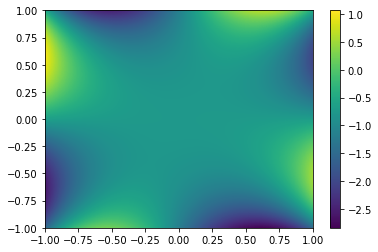

In [45]:
l = 1
n = 1000
x_num = np.linspace(-l, l, num=n)
y_num = x_num

X, Y = np.meshgrid(x_num, y_num, indexing='ij')

num_expr1 = lambdify([x, y], eval_expr1)
Z = num_expr1(X, Y)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z)

fig.colorbar(c)

### Get numerical data by using `LiquidCrystalHelper`

In [46]:
eta_num = lambdify([x, y], eta1)(X, Y)
mu_num = lambdify([x, y], mu1)(X, Y)
nu_num = lambdify([x, y], nu1)(X, Y)

dx = (2*l)/(n - 1)

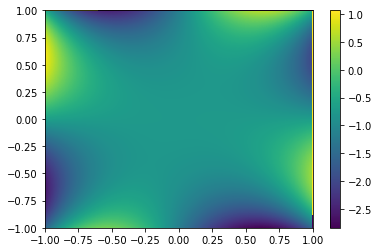

In [47]:
Z_num = lch.Phi_L1(eta_num, mu_num, nu_num, dx)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z_num, vmin=np.min(Z), vmax=np.max(Z))

fig.colorbar(c)

### Find difference everywhere except edges

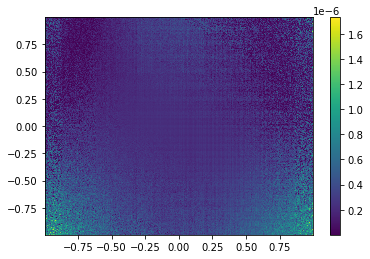

In [48]:
Z_diff = np.abs(Z_num - Z)[2:-2, 2:-2]
X_diff = X[2:-2, 2:-2]
Y_diff = Y[2:-2, 2:-2]

fig, ax = plt.subplots()
c = ax.pcolormesh(X_diff, Y_diff, Z_diff)
fig.colorbar(c)

## $\Phi_{L_2}$ expression

In [49]:
subs_expr2 = Phi_L2.subs(eta, eta1).subs(mu, mu1).subs(nu, nu1)
eval_expr2 = simplify(subs_expr2.doit())

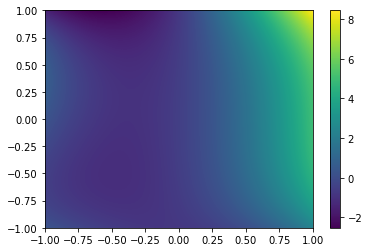

In [50]:
l = 1
n = 1000
x_num = np.linspace(-l, l, num=n)
y_num = x_num

X, Y = np.meshgrid(x_num, y_num, indexing='ij')

num_expr2 = lambdify([x, y], eval_expr2)
Z = num_expr2(X, Y)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z)

fig.colorbar(c)

In [51]:
eta_num = lambdify([x, y], eta1)(X, Y)
mu_num = lambdify([x, y], mu1)(X, Y)
nu_num = lambdify([x, y], nu1)(X, Y)

dx = (2*l)/(n - 1)

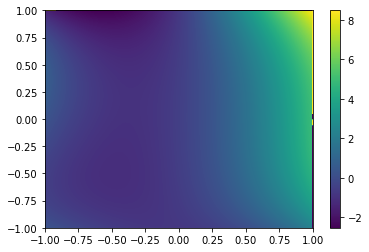

In [52]:
Z_num = lch.Phi_L2(eta_num, mu_num, nu_num, dx)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z_num, vmin=np.min(Z), vmax=np.max(Z))

fig.colorbar(c)

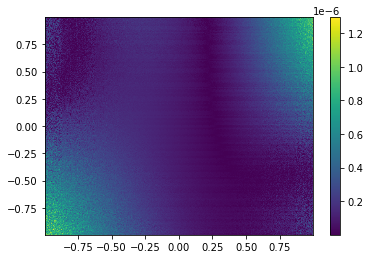

In [53]:
Z_diff = np.abs(Z_num - Z)[2:-2, 2:-2]
X_diff = X[2:-2, 2:-2]
Y_diff = Y[2:-2, 2:-2]

fig, ax = plt.subplots()
c = ax.pcolormesh(X_diff, Y_diff, Z_diff)
fig.colorbar(c)

## $\Phi_{L_3}$ expression

In [54]:
subs_expr3 = Phi_L3.subs(eta, eta1).subs(mu, mu1).subs(nu, nu1)
eval_expr3 = simplify(subs_expr3.doit())

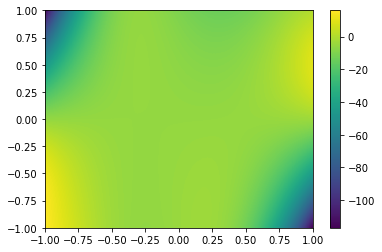

In [55]:
l = 1
n = 1000
x_num = np.linspace(-l, l, num=n)
y_num = x_num

X, Y = np.meshgrid(x_num, y_num, indexing='ij')

num_expr3 = lambdify([x, y], eval_expr3)
Z = num_expr3(X, Y)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z)

fig.colorbar(c)

In [56]:
eta_num = lambdify([x, y], eta1)(X, Y)
mu_num = lambdify([x, y], mu1)(X, Y)
nu_num = lambdify([x, y], nu1)(X, Y)

dx = (2*l)/(n - 1)

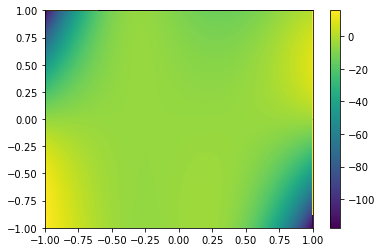

In [57]:
Z_num = lch.Phi_L3(eta_num, mu_num, nu_num, dx)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z_num, vmin=np.min(Z), vmax=np.max(Z))

fig.colorbar(c)

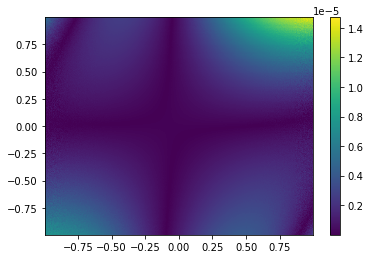

In [58]:
Z_diff = np.abs(Z_num - Z)[2:-2, 2:-2]
X_diff = X[2:-2, 2:-2]
Y_diff = Y[2:-2, 2:-2]

fig, ax = plt.subplots()
c = ax.pcolormesh(X_diff, Y_diff, Z_diff)
fig.colorbar(c)

## $f^{L_1}_i$ expressions

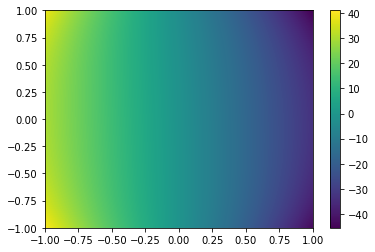

In [59]:
subs_expr_f1 = f_L1[0].subs(eta, eta1).subs(mu, mu1).subs(nu, nu1)
eval_expr_f1 = simplify(subs_expr_f1.doit())
eval_expr_f1

l = 1
n = 1000
x_num = np.linspace(-l, l, num=n)
y_num = x_num

X, Y = np.meshgrid(x_num, y_num, indexing='ij')

num_expr_f1 = lambdify([x, y], eval_expr_f1)
Z = num_expr_f1(X, Y)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z)

fig.colorbar(c)

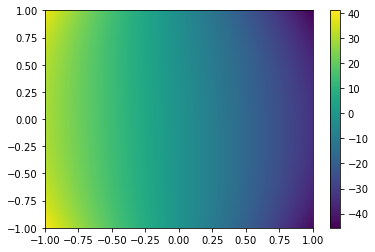

In [60]:
Z_num = lch.fL1(eta_num, mu_num, nu_num, dx)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z_num[0], vmin=np.min(Z), vmax=np.max(Z))

fig.colorbar(c)

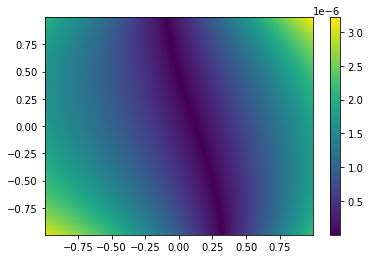

In [61]:
Z_diff = np.abs(Z_num[0] - Z)[2:-2, 2:-2]
X_diff = X[2:-2, 2:-2]
Y_diff = Y[2:-2, 2:-2]

fig, ax = plt.subplots()
c = ax.pcolormesh(X_diff, Y_diff, Z_diff)
fig.colorbar(c)

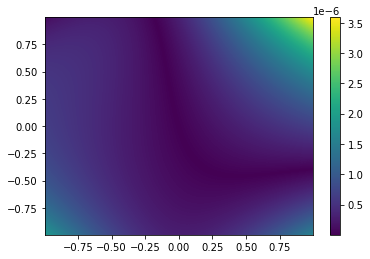

In [62]:
subs_expr_f1 = f_L1[1].subs(eta, eta1).subs(mu, mu1).subs(nu, nu1)
eval_expr_f1 = simplify(subs_expr_f1.doit())
eval_expr_f1

l = 1
n = 1000
x_num = np.linspace(-l, l, num=n)
y_num = x_num

X, Y = np.meshgrid(x_num, y_num, indexing='ij')

num_expr_f1 = lambdify([x, y], eval_expr_f1)
Z = num_expr_f1(X, Y)

Z_diff = np.abs(Z_num[1] - Z)[2:-2, 2:-2]
X_diff = X[2:-2, 2:-2]
Y_diff = Y[2:-2, 2:-2]

fig, ax = plt.subplots()
c = ax.pcolormesh(X_diff, Y_diff, Z_diff)
fig.colorbar(c)

## $f^{L_2}_i$ expressions

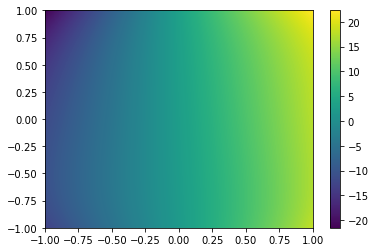

In [63]:
subs_expr_f1 = f_L2[0].subs(eta, eta1).subs(mu, mu1).subs(nu, nu1)
eval_expr_f1 = simplify(subs_expr_f1.doit())
eval_expr_f1

l = 1
n = 1000
x_num = np.linspace(-l, l, num=n)
y_num = x_num

X, Y = np.meshgrid(x_num, y_num, indexing='ij')

num_expr_f1 = lambdify([x, y], eval_expr_f1)
Z = num_expr_f1(X, Y)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z)

fig.colorbar(c)

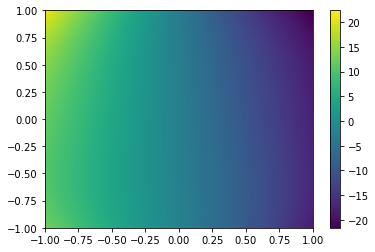

In [64]:
Z_num = lch.fL2(eta_num, mu_num, nu_num, dx)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z_num[0], vmin=np.min(Z), vmax=np.max(Z))

fig.colorbar(c)

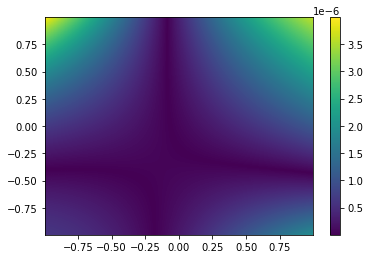

In [65]:
Z_diff = np.abs(Z_num[0] + Z)[2:-2, 2:-2]
X_diff = X[2:-2, 2:-2]
Y_diff = Y[2:-2, 2:-2]

fig, ax = plt.subplots()
c = ax.pcolormesh(X_diff, Y_diff, Z_diff)
fig.colorbar(c)

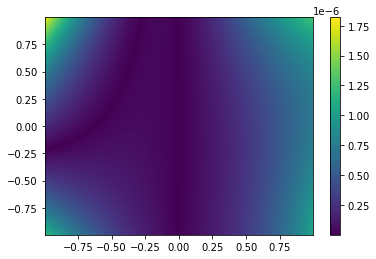

In [66]:
subs_expr_f1 = f_L2[1].subs(eta, eta1).subs(mu, mu1).subs(nu, nu1)
eval_expr_f1 = simplify(subs_expr_f1.doit())
eval_expr_f1

l = 1
n = 1000
x_num = np.linspace(-l, l, num=n)
y_num = x_num

X, Y = np.meshgrid(x_num, y_num, indexing='ij')

num_expr_f1 = lambdify([x, y], eval_expr_f1)
Z = num_expr_f1(X, Y)

Z_diff = np.abs(Z_num[1] + Z)[2:-2, 2:-2]
X_diff = X[2:-2, 2:-2]
Y_diff = Y[2:-2, 2:-2]

fig, ax = plt.subplots()
c = ax.pcolormesh(X_diff, Y_diff, Z_diff)
fig.colorbar(c)

## $f^{L_3}_i$ expressions

In [67]:
subs_expr_f1 = f_L3[0].subs(eta, eta1).subs(mu, mu1).subs(nu, nu1)
eval_expr_f1 = simplify(subs_expr_f1.doit())
eval_expr_f1

l = 1
n = 1000
x_num = np.linspace(-l, l, num=n)
y_num = x_num

X, Y = np.meshgrid(x_num, y_num, indexing='ij')

num_expr_f1 = lambdify([x, y], eval_expr_f1)
Z = num_expr_f1(X, Y)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z)

fig.colorbar(c)

KeyboardInterrupt: 

In [ ]:
Z_num = lch.fL3(eta_num, mu_num, nu_num, dx)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Z_num[0], vmin=np.min(Z), vmax=np.max(Z))

fig.colorbar(c)

In [ ]:
Z_diff = np.abs(Z_num[0] + Z)[2:-2, 2:-2]
X_diff = X[2:-2, 2:-2]
Y_diff = Y[2:-2, 2:-2]

fig, ax = plt.subplots()
c = ax.pcolormesh(X_diff, Y_diff, Z_diff)
fig.colorbar(c)

In [ ]:
subs_expr_f1 = f_L3[1].subs(eta, eta1).subs(mu, mu1).subs(nu, nu1)
eval_expr_f1 = simplify(subs_expr_f1.doit())
eval_expr_f1

l = 1
n = 1000
x_num = np.linspace(-l, l, num=n)
y_num = x_num

X, Y = np.meshgrid(x_num, y_num, indexing='ij')

num_expr_f1 = lambdify([x, y], eval_expr_f1)
Z = num_expr_f1(X, Y)

Z_diff = np.abs(Z_num[1] + Z)[2:-2, 2:-2]
X_diff = X[2:-2, 2:-2]
Y_diff = Y[2:-2, 2:-2]

fig, ax = plt.subplots()
c = ax.pcolormesh(X_diff, Y_diff, Z_diff)
fig.colorbar(c)